In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM

In [3]:
# Load the dataset
file_path = 'C:\\Users\\nihar\\OneDrive\\Desktop\\Bootcamp\\SCMA 632\\DataSet\\pinksheet.xlsx'
df = pd.read_excel(file_path, sheet_name="Monthly Prices", skiprows=6)

In [5]:
# Rename the first column to "Date"
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [7]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'].astype(str) + '01', format='%YM%m%d')

In [9]:
# Select specific columns (Date and selected commodities)
commodity_columns = ['Date', df.columns[2], df.columns[24], df.columns[69], df.columns[71], df.columns[60], df.columns[30]]
commodity = df[commodity_columns]
commodity.columns = ['Date', 'crude_brent', 'soybeans', 'gold', 'silver', 'urea_ee_bulk', 'maize']

In [11]:
# Check for missing values
missing_values = commodity.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date            0
crude_brent     0
soybeans        0
gold            0
silver          0
urea_ee_bulk    0
maize           0
dtype: int64


In [13]:
# Check column names
print("Column Names:", commodity.columns)

Column Names: Index(['Date', 'crude_brent', 'soybeans', 'gold', 'silver', 'urea_ee_bulk',
       'maize'],
      dtype='object')


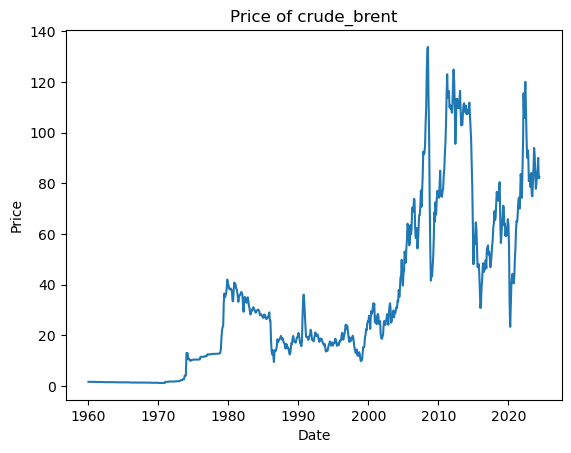

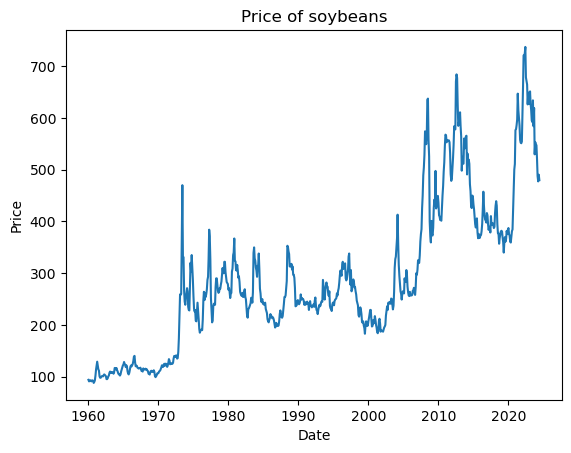

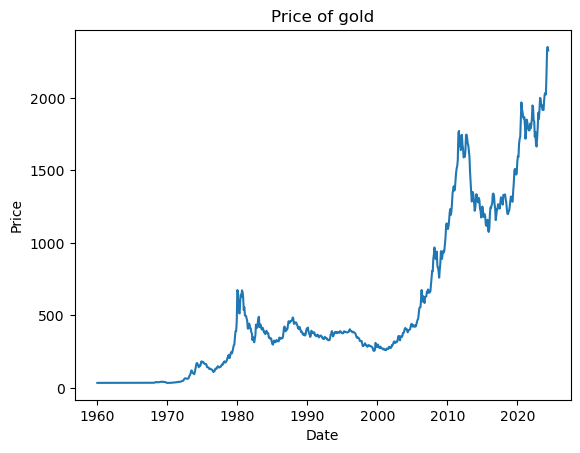

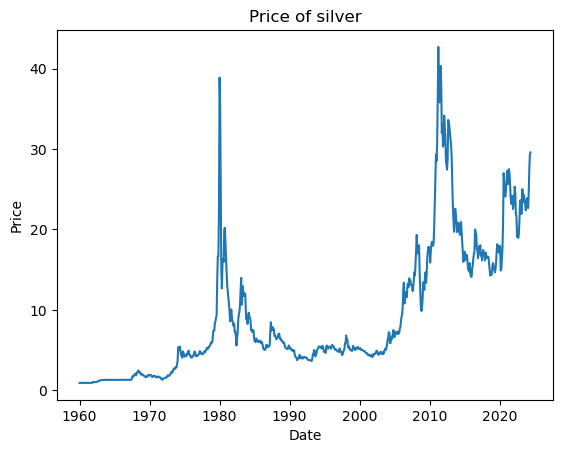

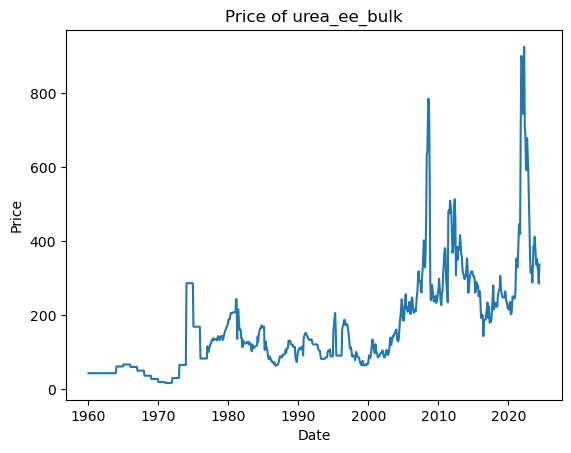

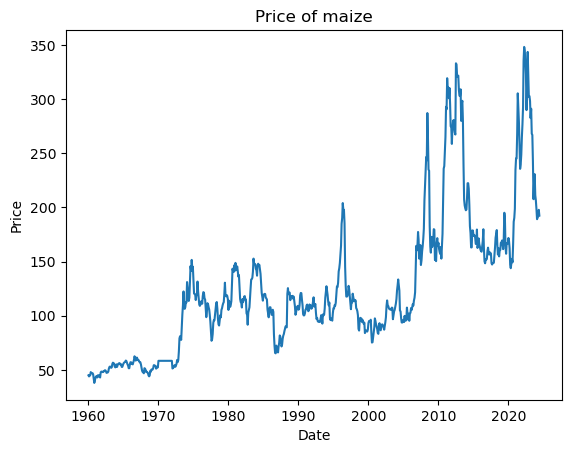

In [15]:
# Visualize data
for col in commodity.columns[1:]:  # Skip the date column
    plt.figure()
    plt.plot(commodity['Date'], commodity[col])
    plt.title(f'Price of {col}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [17]:
# Prepare data for VAR and VECM analysis
commodity_data = commodity.drop(columns=['Date'])
columns_to_test = commodity_data.columns

In [21]:
# Stationarity test
from statsmodels.tsa.stattools import adfuller

non_stationary_count = 0
stationary_columns = []
non_stationary_columns = []

for col in columns_to_test:
    result = adfuller(commodity_data[col])
    p_value = result[1]
    print(f"\nADF test result for column: {col}")
    print(result)
    
    if p_value > 0.05:
        non_stationary_count += 1
        non_stationary_columns.append(col)
    else:
        stationary_columns.append(col)

print(f"\nNumber of non-stationary columns: {non_stationary_count}")
print(f"Non-stationary columns: {', '.join(non_stationary_columns)}")
print(f"Stationary columns: {', '.join(stationary_columns)}")


ADF test result for column: crude_brent
(-1.5078661910935343, 0.5296165197702398, 15, 758, {'1%': -3.439006442437876, '5%': -2.865360521688131, '10%': -2.5688044403756587}, 4066.6988288806638)

ADF test result for column: soybeans
(-2.4231464527418902, 0.1353097742779038, 2, 771, {'1%': -3.4388599939707056, '5%': -2.865295977855759, '10%': -2.5687700561872413}, 6628.115125985425)

ADF test result for column: gold
(1.3430517021933006, 0.9968394353612382, 11, 762, {'1%': -3.4389608473398194, '5%': -2.8653404270188476, '10%': -2.568793735369693}, 7235.396489477796)

ADF test result for column: silver
(-1.397294710746222, 0.5835723787985764, 7, 766, {'1%': -3.438915730045254, '5%': -2.8653205426302253, '10%': -2.5687831424305845}, 2389.2895266530068)

ADF test result for column: urea_ee_bulk
(-2.5101716315209086, 0.11301903181624645, 15, 758, {'1%': -3.439006442437876, '5%': -2.865360521688131, '10%': -2.5688044403756587}, 7263.370731967089)

ADF test result for column: maize
(-2.47004510


Johansen's Test Results:
[194.54858991 118.95889314  70.1480132   38.12513847  16.53520264
   5.6366925 ]
Det. terms outside the coint. relation & lagged endog. parameters for equation crude_brent
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.crude_brent       0.3221      0.038      8.403      0.000       0.247       0.397
L1.soybeans          0.0113      0.008      1.496      0.135      -0.004       0.026
L1.gold              0.0009      0.006      0.138      0.890      -0.012       0.013
L1.silver           -0.0849      0.161     -0.527      0.598      -0.401       0.231
L1.urea_ee_bulk     -0.0047      0.005     -0.956      0.339      -0.014       0.005
L1.maize             0.0131      0.018      0.747      0.455      -0.021       0.048
L2.crude_brent      -0.0627      0.041     -1.541      0.123      -0.142       0.017
L2.soybeans          0.0193      0.00

<Figure size 640x480 with 0 Axes>

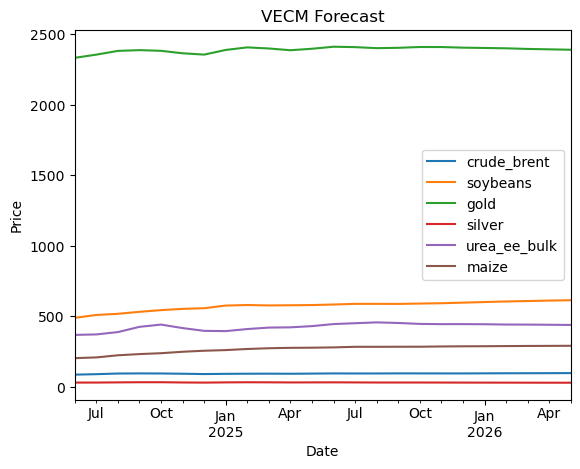

In [27]:
# Co-Integration Test (Johansen's Test)
from statsmodels.tsa.vector_ar.vecm import select_order, select_coint_rank

lags = select_order(commodity_data, maxlags=10, deterministic='ci')
lag_length = lags.aic

johansen_test = coint_johansen(commodity_data, det_order=0, k_ar_diff=lag_length)
print("\nJohansen's Test Results:")
print(johansen_test.lr1)

# Assuming the commodity names are the same as in the original DataFrame
commodity_names = ['crude_brent', 'soybeans', 'gold', 'silver', 'urea_ee_bulk', 'maize']

# Forecast data from VECM or VAR model
if r > 0:
    vecm_model = VECM(commodity_data, k_ar_diff=lag_length, coint_rank=r, deterministic='ci')
    vecm_fit = vecm_model.fit()
    print(vecm_fit.summary())
    
    # Forecasting
    forecast = vecm_fit.predict(steps=24)
    forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=commodity['Date'].iloc[-1], periods=24, freq='M'), columns=commodity_names)
    
    plt.figure()
    forecast_df.plot()
    plt.title('VECM Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
else:
    var_model = VAR(commodity_data)
    var_fit = var_model.fit(lag_length)
    print(var_fit.summary())
    
    forecast = var_fit.forecast(var_fit.y, steps=24)
    forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=commodity['Date'].iloc[-1], periods=24, freq='M'), columns=commodity_names)
    
    plt.figure()
    forecast_df.plot()
    plt.title('VAR Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [29]:
# Display forecasted data
forecast_df

,crude_brent,soybeans,gold,silver,urea_ee_bulk,maize
2024-06-30,85.888503,488.761520,2332.308968,29.607825,367.670256,202.875308
2024-07-31,89.244039,508.935684,2354.868113,29.806345,371.087256,208.079842
2024-08-31,93.820815,517.294646,2381.381356,31.031318,387.729509,223.197614
2024-09-30,94.613183,531.397241,2386.714062,32.147449,424.802066,231.681974
2024-10-31,94.135390,543.251707,2381.796246,32.119732,440.793087,237.921891
2024-11-30,92.361435,552.289242,2364.478781,30.406915,416.074898,248.173268
2024-12-31,89.981453,556.880216,2355.103195,29.475052,396.358719,255.442875
2025-01-31,91.638067,575.700604,2388.060234,30.954506,394.549091,260.004185
2025-02-28,92.497888,579.512026,2406.291746,31.924911,409.186597,267.864783
2025-03-31,92.851176,576.592874,2398.420189,31.408829,419.510211,273.156941


In [31]:
# Load the dataset
file_path = 'C:\\Users\\nihar\\OneDrive\\Desktop\\Bootcamp\\SCMA 632\\DataSet\\pinksheet.xlsx'
df = pd.read_excel(file_path, sheet_name="Monthly Prices", skiprows=6)

In [33]:
# Rename the first column to "Date"
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [35]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'].astype(str) + '01', format='%YM%m%d')

In [37]:
# Select metal commodities columns (Date and selected commodities)
commodity_columns2 = ['Date', df.columns[63], df.columns[64], df.columns[65], df.columns[66], df.columns[67], df.columns[68]]
commodity2 = df[commodity_columns2]
commodity2.columns = ['Date', 'iron_ore', 'copper', 'lead', 'tin', 'nickel', 'zinc']

In [39]:
# Check for missing values
missing_values2 = commodity2.isna().sum()
print("Missing Values:\n", missing_values2)

Missing Values:
 Date        0
iron_ore    0
copper      0
lead        0
tin         0
nickel      0
zinc        0
dtype: int64


In [41]:
# Check column names
print("Column Names:", commodity2.columns)

Column Names: Index(['Date', 'iron_ore', 'copper', 'lead', 'tin', 'nickel', 'zinc'], dtype='object')


Column names and corresponding readable names:
iron_ore : Iron Ore
copper : Copper
lead : Lead
tin : Tin
nickel : Nickel
zinc : Zinc
iron_ore


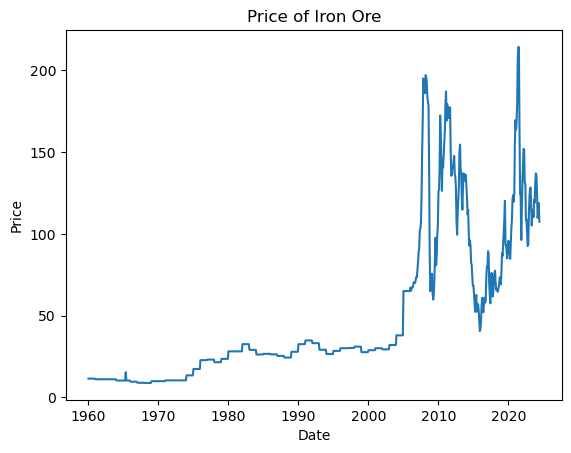

copper


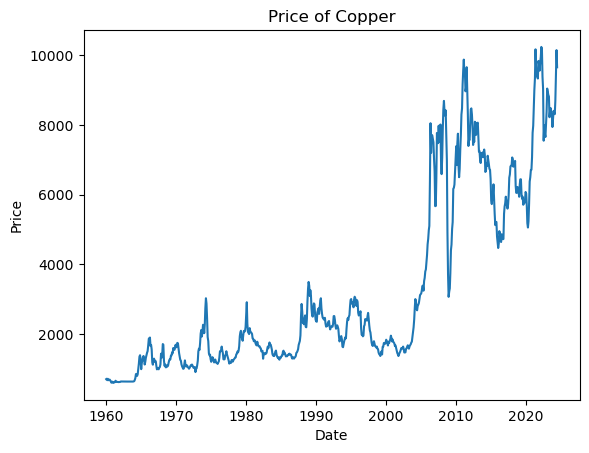

lead


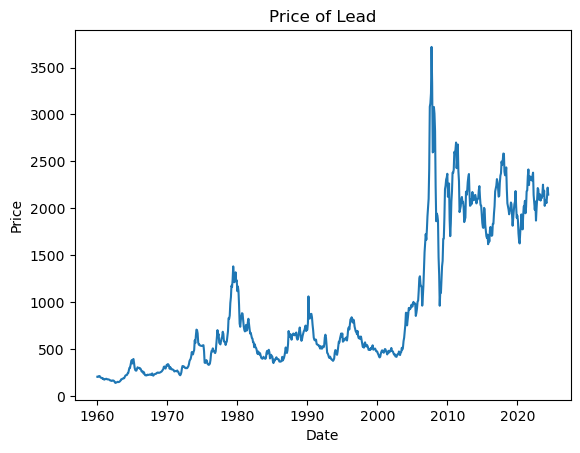

tin


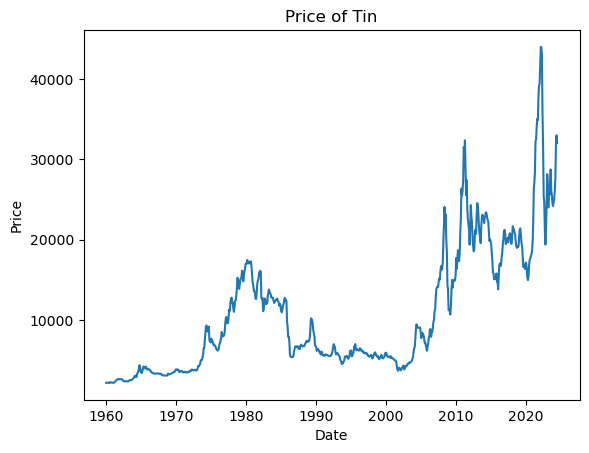

nickel


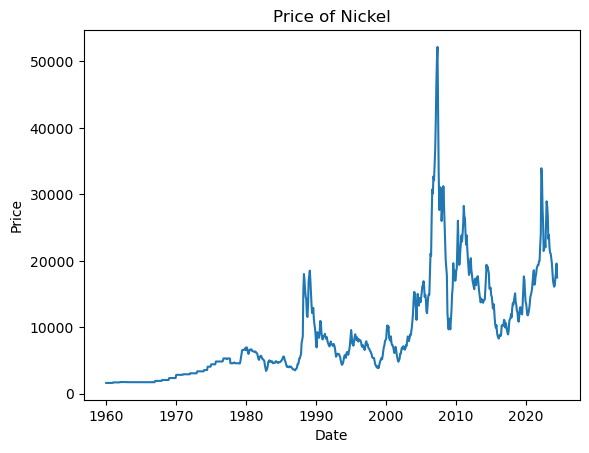

zinc


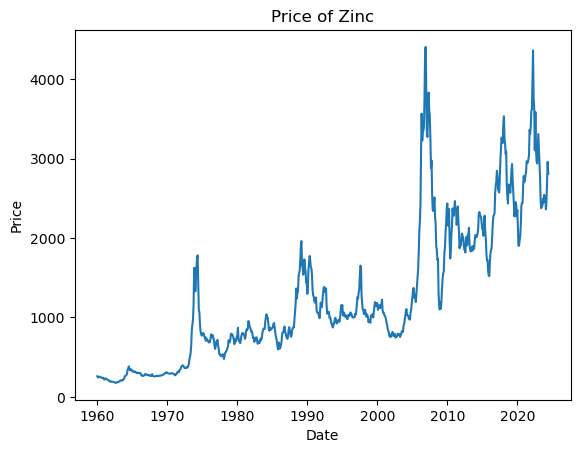

In [43]:

# Mapping of new column names to more readable commodity names
commodity2_names = {
    'iron_ore': "Iron Ore",
    'copper': "Copper",
    'lead': "Lead",
    'tin': "Tin",
    'nickel': "Nickel",
    'zinc': "Zinc"
}

# Print column names and corresponding readable names for debugging
print("Column names and corresponding readable names:")
for col in commodity2.columns[1:]:
    print(f"{col} : {commodity2_names[col]}")

# Visualize data directly
for col in commodity2.columns[1:]:  # Skip the date column
    print(col)  # Print column name for debugging
    plt.figure()
    plt.plot(commodity2['Date'], commodity2[col])
    plt.title(f'Price of {commodity2_names[col]}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [45]:
# Prepare data for VAR and VECM analysis
commodity2_data = commodity2.drop(columns=['Date'])
columns_to_test2 = commodity2_data.columns

In [47]:
# Stationarity test
from statsmodels.tsa.stattools import adfuller

non_stationary_count2 = 0
stationary_columns2 = []
non_stationary_columns2 = []

for col in columns_to_test2:
    result = adfuller(commodity2_data[col])
    p_value = result[1]
    print(f"\nADF test result for column: {col}")
    print(result)
    
    if p_value > 0.05:
        non_stationary_count2 += 1
        non_stationary_columns2.append(col)
    else:
        stationary_columns2.append(col)

print(f"\nNumber of non-stationary columns: {non_stationary_count2}")
print(f"Non-stationary columns: {', '.join(non_stationary_columns2)}")
print(f"Stationary columns: {', '.join(stationary_columns2)}")


ADF test result for column: iron_ore
(-1.3240068146698327, 0.618118863950208, 20, 753, {'1%': -3.4390641198617864, '5%': -2.8653859408474482, '10%': -2.5688179819544312}, 4823.994232303855)

ADF test result for column: copper
(-0.7281883491664048, 0.8393124032245429, 16, 757, {'1%': -3.4390179167598367, '5%': -2.8653655786032237, '10%': -2.5688071343462777}, 10407.876412157959)

ADF test result for column: lead
(-1.0431678801996331, 0.7371961625765212, 18, 755, {'1%': -3.4390409569041207, '5%': -2.865375732701395, '10%': -2.568812543748081}, 8816.995724796969)

ADF test result for column: tin
(-0.47179397762640596, 0.897404180254543, 21, 752, {'1%': -3.439075747702915, '5%': -2.8653910653234655, '10%': -2.568820711931304}, 12238.676957369022)

ADF test result for column: nickel
(-2.827833849536527, 0.054406577547331206, 8, 765, {'1%': -3.438926964986094, '5%': -2.8653254941943174, '10%': -2.5687857802554572}, 12682.018153532776)

ADF test result for column: zinc
(-2.1865321790575822, 


Johansen's Test Results:
[98.09948892 61.73353248 38.52625351 20.26737158  8.36049255  1.46459933]
Det. terms outside the coint. relation & lagged endog. parameters for equation iron_ore
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.iron_ore      0.2674      0.038      7.006      0.000       0.193       0.342
L1.copper        0.0030      0.001      2.413      0.016       0.001       0.005
L1.lead          0.0086      0.003      2.729      0.006       0.002       0.015
L1.tin          -0.0004      0.000     -1.266      0.205      -0.001       0.000
L1.nickel        0.0001      0.000      0.462      0.644      -0.000       0.001
L1.zinc         -0.0039      0.003     -1.500      0.134      -0.009       0.001
L2.iron_ore     -0.0658      0.039     -1.670      0.095      -0.143       0.011
L2.copper        0.0014      0.001      1.088      0.277      -0.001       0.004
L2

<Figure size 640x480 with 0 Axes>

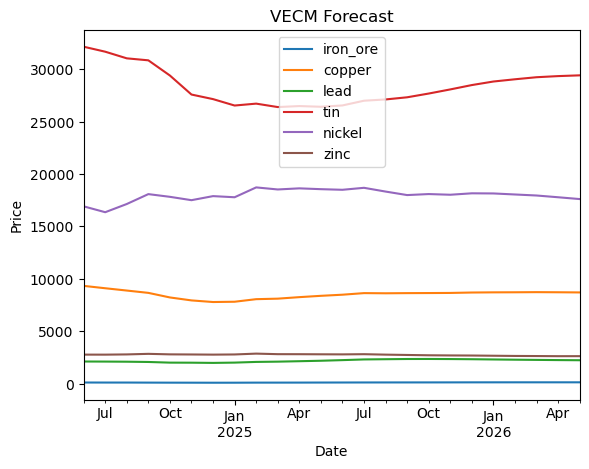

In [49]:
# Co-Integration Test (Johansen's Test)
from statsmodels.tsa.vector_ar.vecm import select_order, select_coint_rank

lags2 = select_order(commodity2_data, maxlags=10, deterministic='ci')
lag_length2 = lags2.aic

johansen_test2 = coint_johansen(commodity2_data, det_order=0, k_ar_diff=lag_length2)
print("\nJohansen's Test Results:")
print(johansen_test2.lr1)

r2 = 3  # Replace with the actual number from the test results

if r2 > 0:
    vecm_model2 = VECM(commodity2_data, k_ar_diff=lag_length2, coint_rank=r2, deterministic='ci')
    vecm_fit2 = vecm_model2.fit()
    print(vecm_fit2.summary())
    
    # Forecasting
    forecast2 = vecm_fit2.predict(steps=24)
    forecast_df2 = pd.DataFrame(forecast2, index=pd.date_range(start=commodity2['Date'].iloc[-1], periods=24, freq='M'), columns=commodity2.columns[1:])
    
    plt.figure()
    forecast_df2.plot()
    plt.title('VECM Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
else:
    var_model2 = VAR(commodity2_data)
    var_fit2 = var_model2.fit(lag_length2)
    print(var_fit2.summary())
    
    forecast2 = var_fit2.forecast(var_fit2.y, steps=24)
    forecast_df2 = pd.DataFrame(forecast2, index=pd.date_range(start=commodity2['Date'].iloc[-1], periods=24, freq='M'), columns=commodity2.columns[1:])
    
    plt.figure()
    forecast_df2.plot()
    plt.title('VAR Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

In [51]:
# Display forecasted data
forecast_df2

,iron_ore,copper,lead,tin,nickel,zinc
2024-06-30,104.793063,9328.137049,2109.924544,32152.889031,16918.271225,2767.041126
2024-07-31,101.371113,9101.668501,2102.595957,31677.929418,16358.448559,2764.749422
2024-08-31,101.552410,8881.998604,2090.994382,31044.060999,17141.590227,2786.369374
2024-09-30,95.362768,8659.864527,2065.216156,30853.968639,18085.387629,2840.784277
2024-10-31,90.994316,8223.143368,2002.536266,29403.948035,17827.218597,2791.650002
2024-11-30,88.570304,7940.999343,1996.856058,27589.170681,17506.542406,2780.473820
2024-12-31,84.898068,7786.910627,1976.529380,27152.609628,17894.254324,2766.350752
2025-01-31,87.122793,7814.379763,2004.647972,26540.328462,17786.381945,2782.291653
2025-02-28,93.912969,8058.697899,2070.503234,26721.348915,18726.460310,2862.401316
2025-03-31,95.069665,8108.040877,2096.213176,26394.117239,18529.232247,2810.327408
